# USED CAR SALES - EXPLORATORY DATA ANALYSIS
Project: Cars4U (Used Car Dataset)

Objective: Understand the main drivers of used car prices

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
import missingno as msno

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_colwidth',400)

In [ ]:
# Load data
data = pd.read_csv('/content/used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


# Basic Inspection

In [ ]:
data.shape

(7253, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [ ]:
data.isna().sum()

,0
S.No.,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,46


<Axes: >

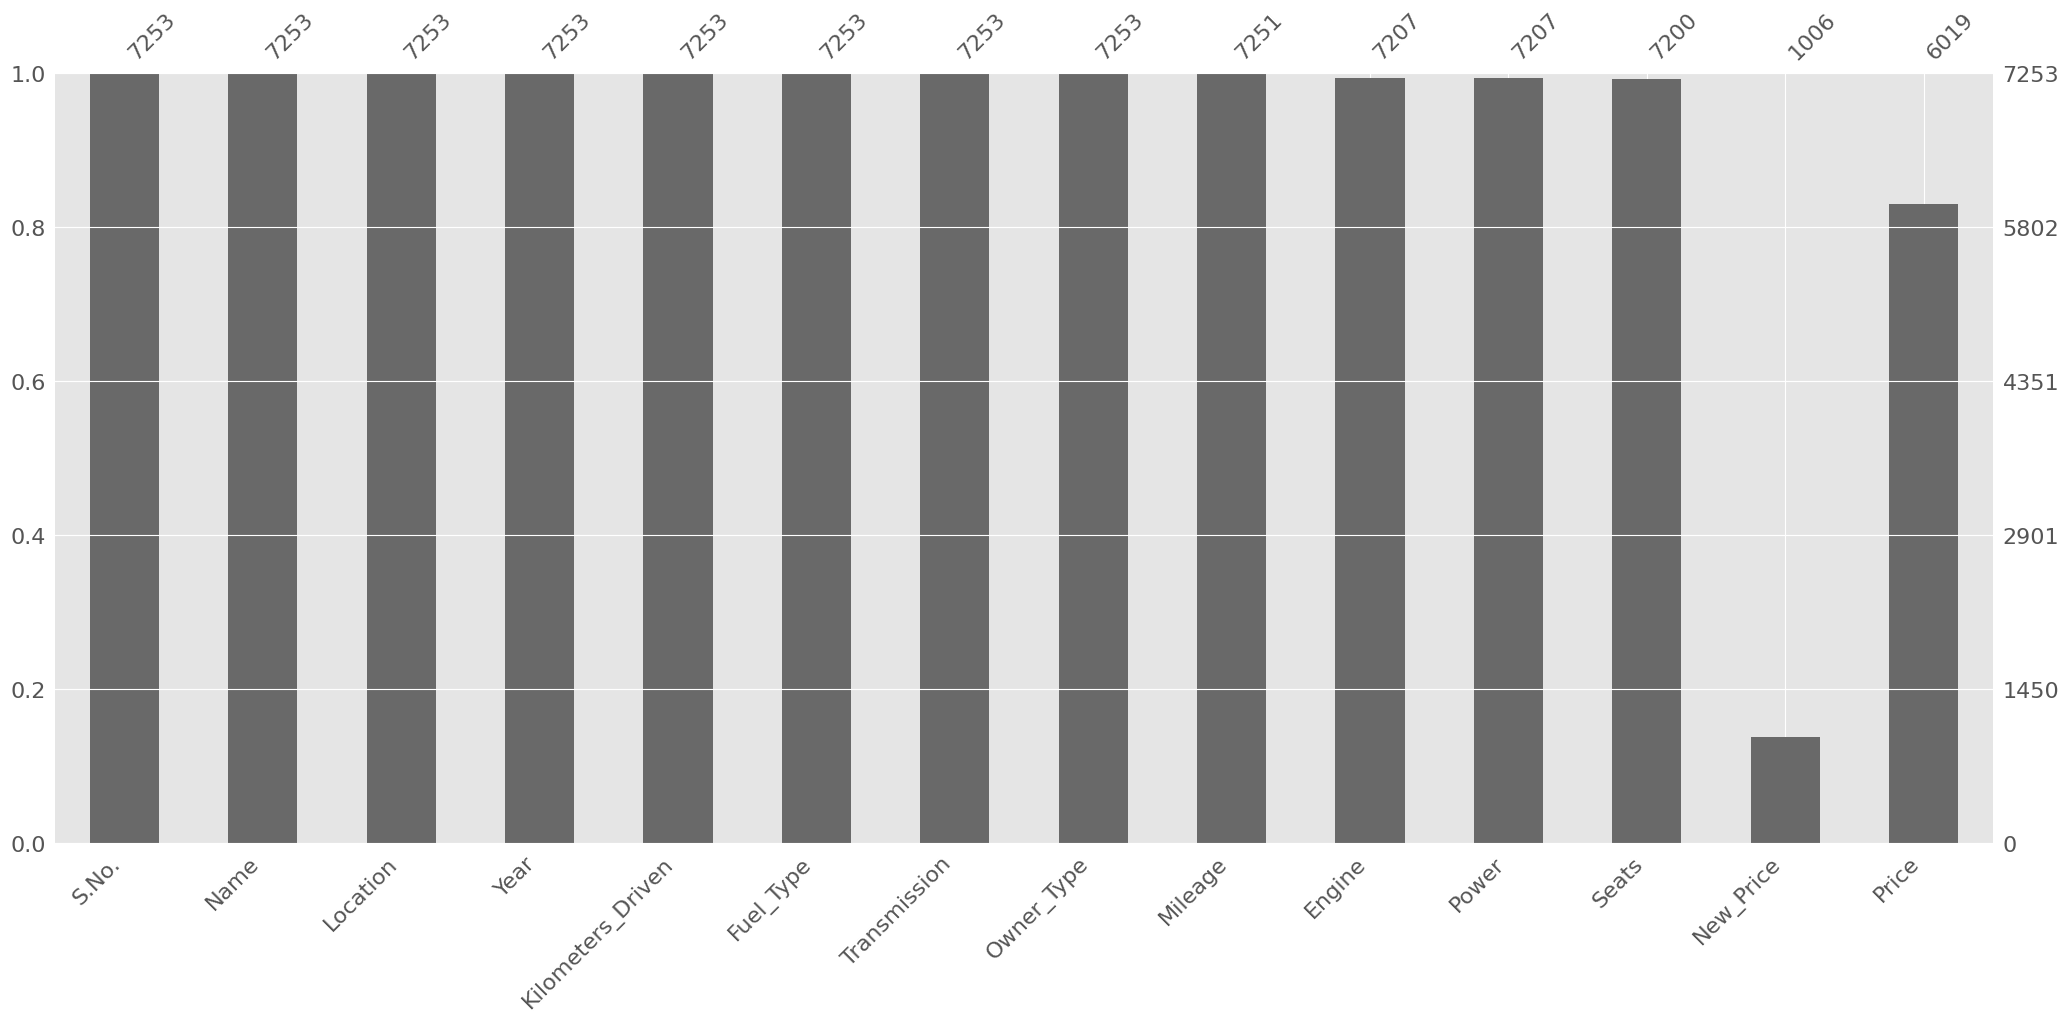

In [ ]:
# Vizualizing missing values
msno.bar(data)

In [ ]:
# column wise unqique values
data.nunique()

,0
S.No.,7253
Name,2041
Location,11
Year,23
Kilometers_Driven,3660
Fuel_Type,5
Transmission,2
Owner_Type,4
Mileage,450
Engine,150


# Data Cleaning

In [ ]:
# Drop unneccessary columns
data = data.drop(['S.No.'], axis = 1)

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740


In [ ]:
# Add car age feature
from datetime import date
date.today().year
data['Car_Age'] = date.today().year - data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740,12


In [ ]:
# Extract Brand and Model
data['Name'].unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Ford EcoSport 1.5 Petrol Ambiente',
       'Jeep Compass 1.4 Sport', 'Hyundai Elite i20 Magna Plus'],
      dtype=object)

In [ ]:
data['Brand'] = data.Name.str.split().str.get(0)

In [ ]:
data['Brand'].sample(20)

,Brand
4573,Maruti
837,Hyundai
5733,Ford
1298,Maruti
7185,Hyundai
5567,Volkswagen
2683,Maruti
5710,Maruti
488,BMW
2444,Chevrolet


In [ ]:
data['Model'] = (data.Name.str.split().str.get(1).fillna('') + ' '+ data.Name.str.split().str.get(2).fillna('')).str.strip()

In [ ]:
data['Model'].sample(20)

,Model
5965,New C-Class
1795,Swift VDI
650,Ciaz ZDi
1526,Yeti Ambition
947,Ameo 1.2
5122,Fortuner 4x2
1146,Bolero ZLX
6672,EON Magna
5708,BRV i-VTEC
6288,Tavera LS


In [ ]:
data['Brand'].unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Rover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [ ]:
# Standardize brand names
data["Brand"].replace({"ISUZU": "Isuzu", "Mini":"Mini Cooper", "Land": "Land Rover"},inplace = True)

In [ ]:
# Process Mileage
data['Mileage'].sample(10)

,Mileage
2674,25.0 kmpl
4451,13.0 kmpl
854,16.55 kmpl
5860,16.55 kmpl
1860,20.54 kmpl
5062,23.1 kmpl
6153,13.9 kmpl
5578,22.07 kmpl
4391,21.64 kmpl
6552,22.07 kmpl


In [ ]:
# Extract numeric part
data['Mileage_Value'] = data['Mileage'].astype(str).str.extract('(\d+\.?\d*)').astype('float')

In [ ]:
data['Mileage_Value'].sample(10)

,Mileage_Value
541,18.000
6423,16.550
5827,22.540
2489,17.000
1502,11.740
3725,26.590
5522,20.770
4807,14.670
1484,16.800
125,12.050


In [ ]:
# Extract unit
data['Mileage_Unit'] = data['Mileage'].astype(str).str.extract('([a-zA-Z/]+)')

In [ ]:
data['Mileage_Unit'].unique()

array(['km/kg', 'kmpl', 'nan'], dtype=object)

In [ ]:
# Convert CNG/LPG mileage to kmpl equivalent
is_cng_lpg = (data['Fuel_Type'] == 'CNG') | (data['Fuel_Type'] == 'LPG')
data.loc[is_cng_lpg, 'Mileage_Value'] *= 1.4

# Fill missing with median
data['Mileage_Value'].fillna(data['Mileage_Value'].median(), inplace = True)

In [ ]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model,Mileage_Value,Mileage_Unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.000,NaN,1.750,15,Maruti,Wagon R,37.240,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.000,NaN,12.500,10,Hyundai,Creta 1.6,19.670,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.000,8.61 Lakh,4.500,14,Honda,Jazz V,18.200,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.000,NaN,6.000,13,Maruti,Ertiga VDI,20.770,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.000,NaN,17.740,12,Audi,A4 New,15.200,kmpl


# CLEAN ENGINE, POWER, SEATS, PRICE

In [ ]:
# Engine
data['Engine'] =data['Engine'].astype(str).str.replace('CC','',regex =False)
data['Engine']=pd.to_numeric(data['Engine'],errors='coerce')

if data['Engine'].isnull().any():
    data['Engine'].fillna(data['Engine'].median(), inplace=True)

In [ ]:
# Power
data['Power']= data['Power'].astype(str).str.replace('bhp','',regex =False)
data['Power']=pd.to_numeric(data['Power'],errors='coerce')

if data['Power'].isnull().any():
    data['Power'].fillna(data['Power'].median(), inplace=True)

In [ ]:
# Seats
if data['Seats'].isnull().any():
    data['Seats'].fillna(data['Seats'].median(), inplace=True)

In [ ]:
# Price
if data['Price'].isnull().any():
    data['Price'].fillna(data['Price'].median(), inplace=True)

In [ ]:
# Check missing values
data.isnull().sum()

,0
Name,0
Location,0
Year,0
Kilometers_Driven,0
Fuel_Type,0
Transmission,0
Owner_Type,0
Mileage,2
Engine,0
Power,0


In [ ]:
# Drop unused columns
data.drop('Mileage', axis=1, inplace=True)
data.drop('New_Price', axis=1, inplace=True)
data.drop('Mileage_Unit', axis=1, inplace=True)

# SEPARATE NUMERICAL & CATEGORICAL

In [ ]:

cat_cols = data.select_dtypes(include='object').columns
cat_cols

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [ ]:
num_cols = data.select_dtypes(include='number').columns
num_cols

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats', 'Price',
       'Car_Age', 'Mileage_Value'],
      dtype='object')

# UNIVARIATE ANALYSIS

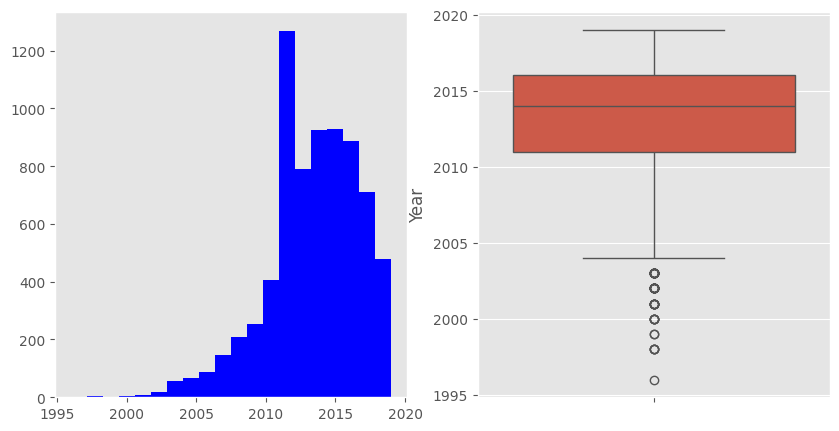

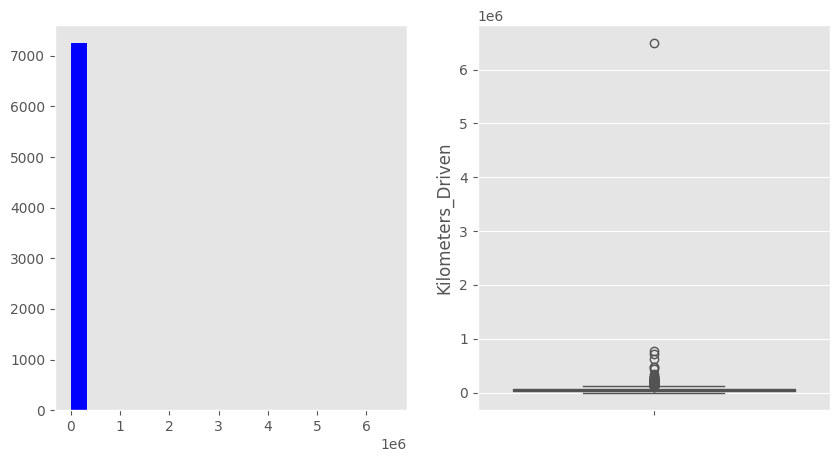

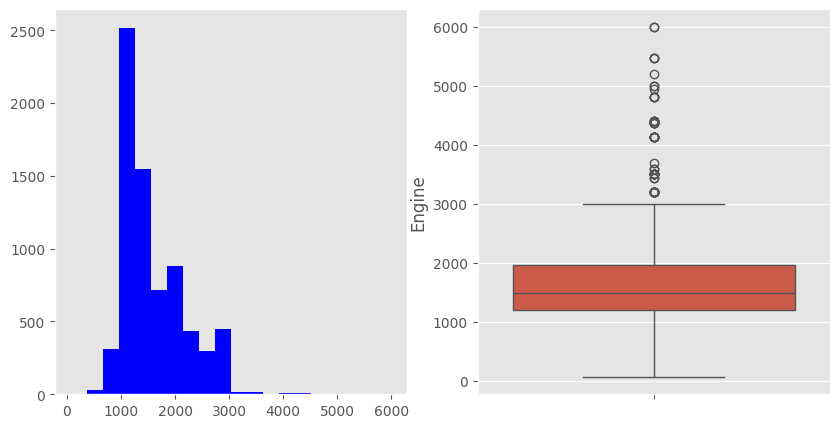

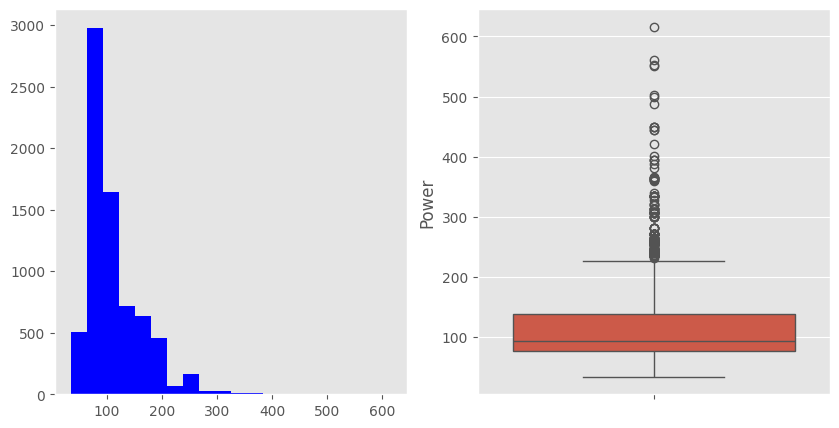

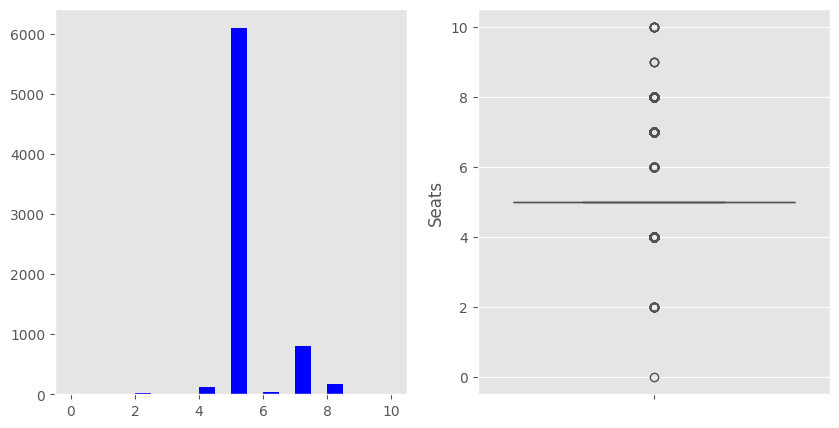

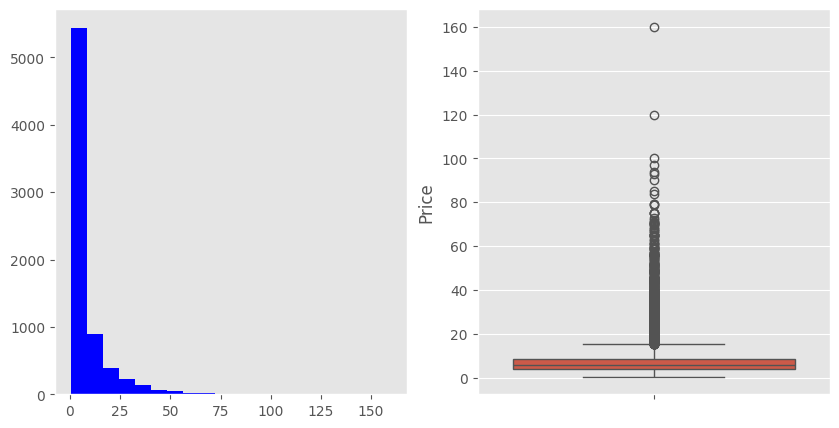

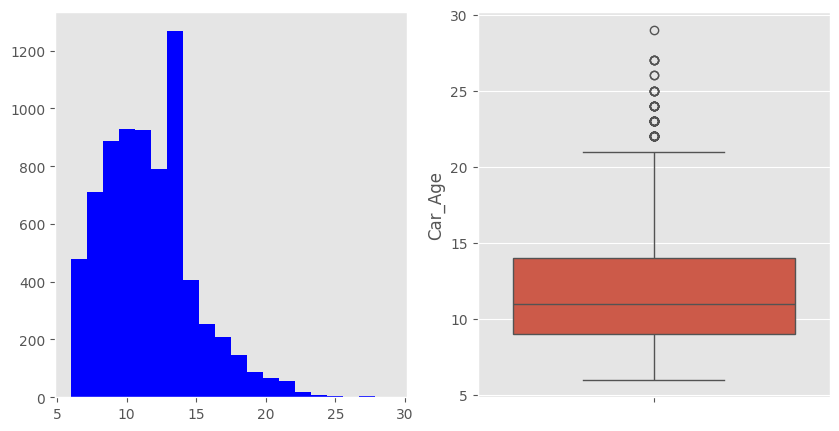

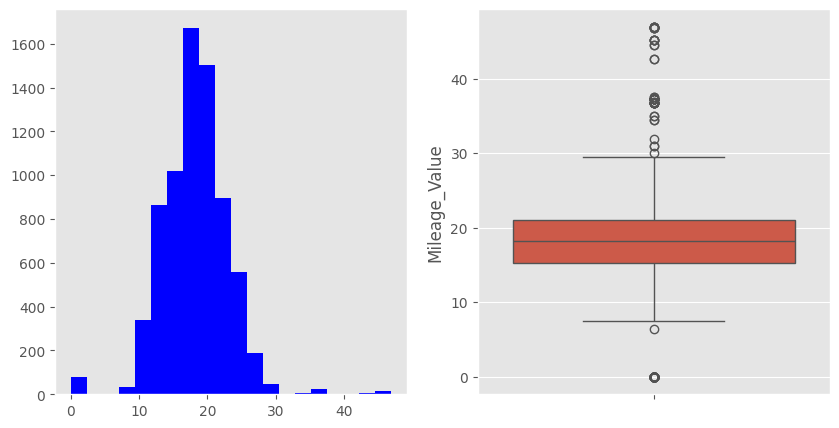

In [ ]:
# Numerical Columns
for cols in num_cols:
  plt.figure(figsize = (10,5))
  plt.subplot(1,2,1)
  data[cols].hist(grid=False, bins = 20, color = 'blue')
  plt.subplot(1,2,2)
  sns.boxplot(data[cols])
  plt.show()


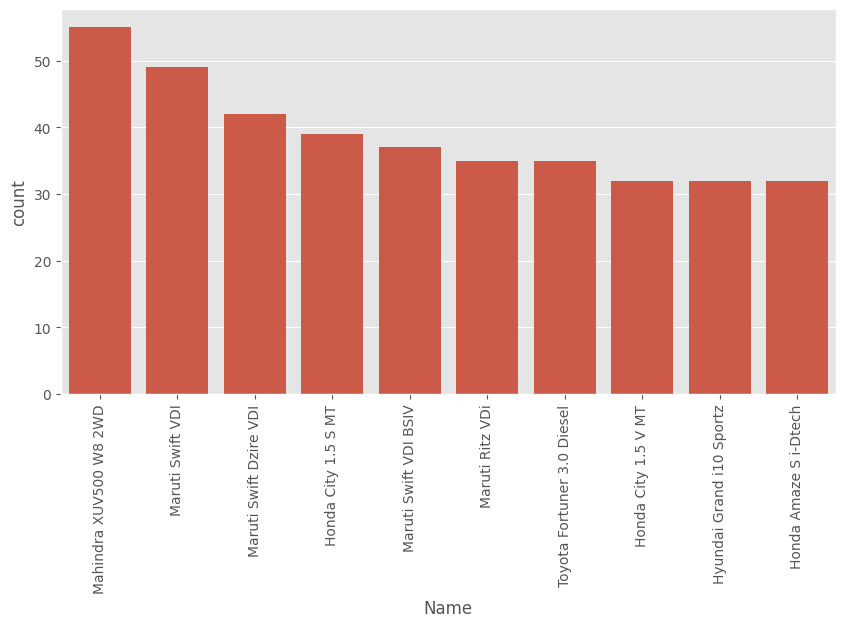

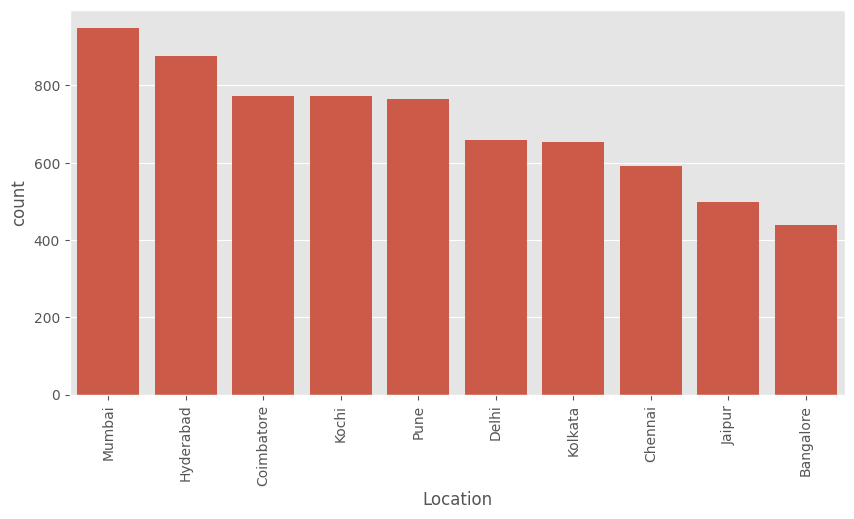

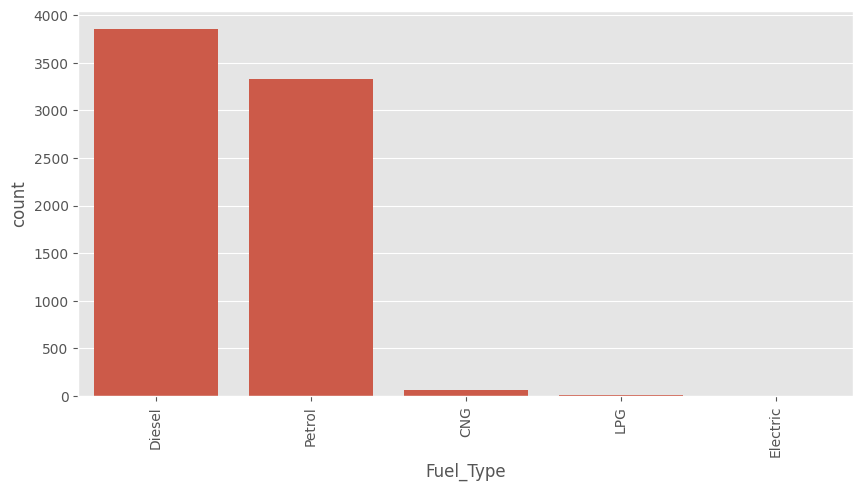

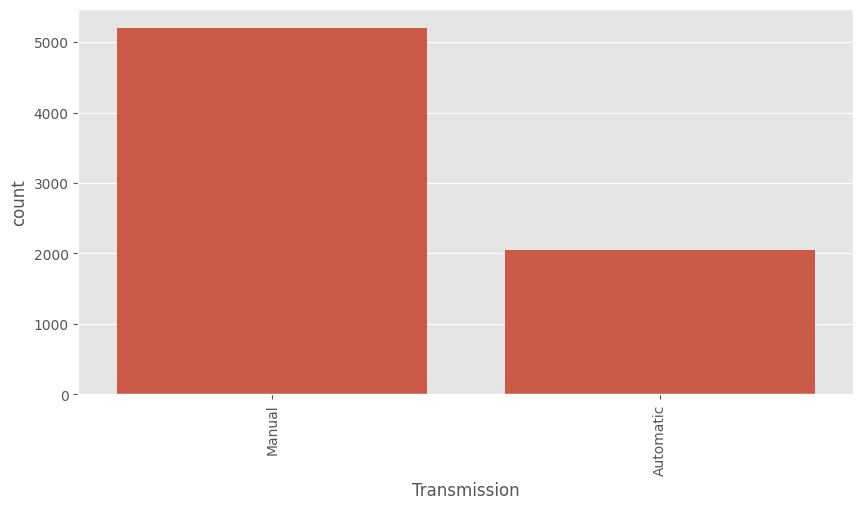

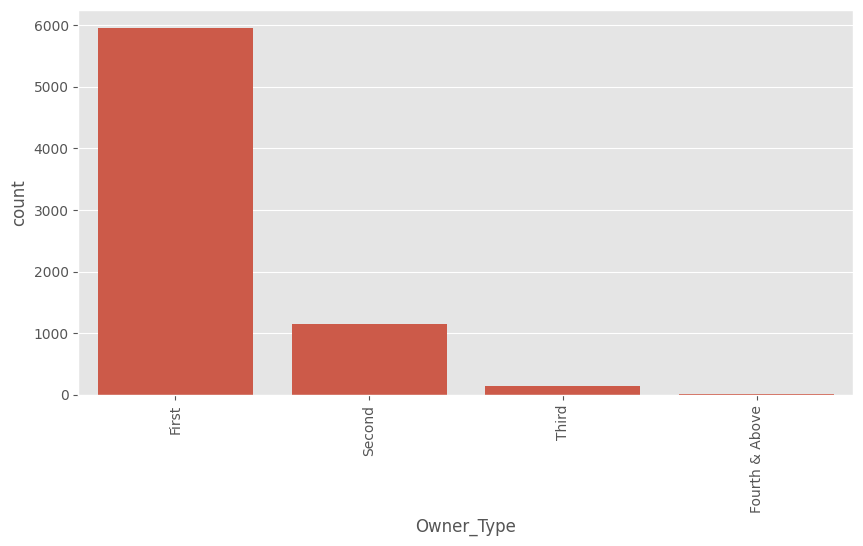

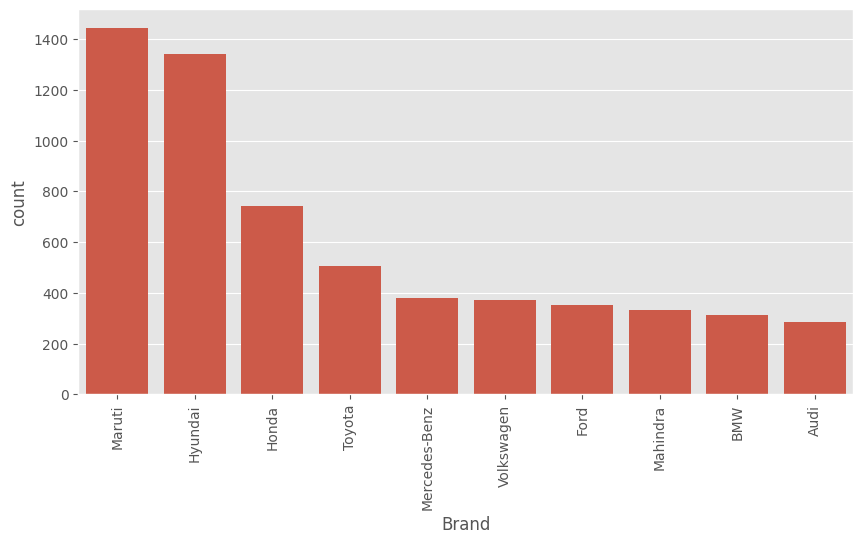

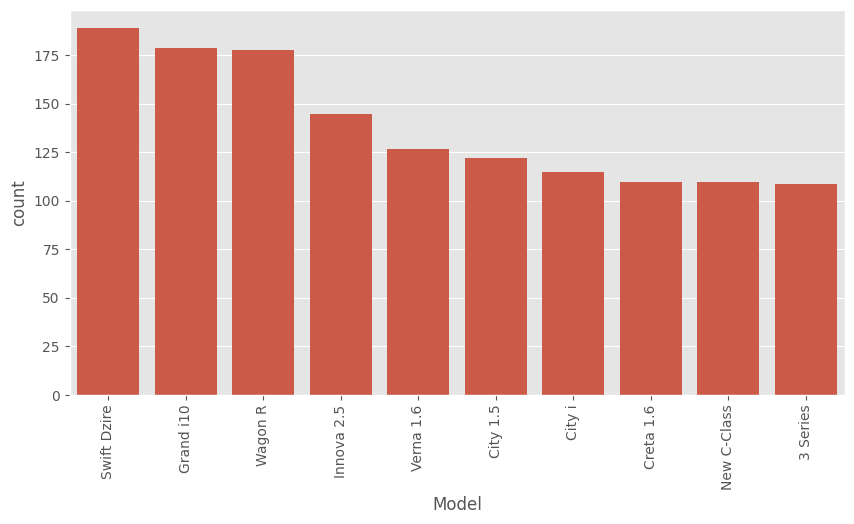

In [ ]:
# Categorical Columns (Top 10)
for cols in cat_cols:
  plt.figure(figsize = (10,5))
  top_10 = data[cols].value_counts().head(10).index
  sns.countplot(  data = data, x = cols, order = top_10)
  plt.xticks(rotation=90)
  plt.show()

# MULTIVARIATE ANALYSIS

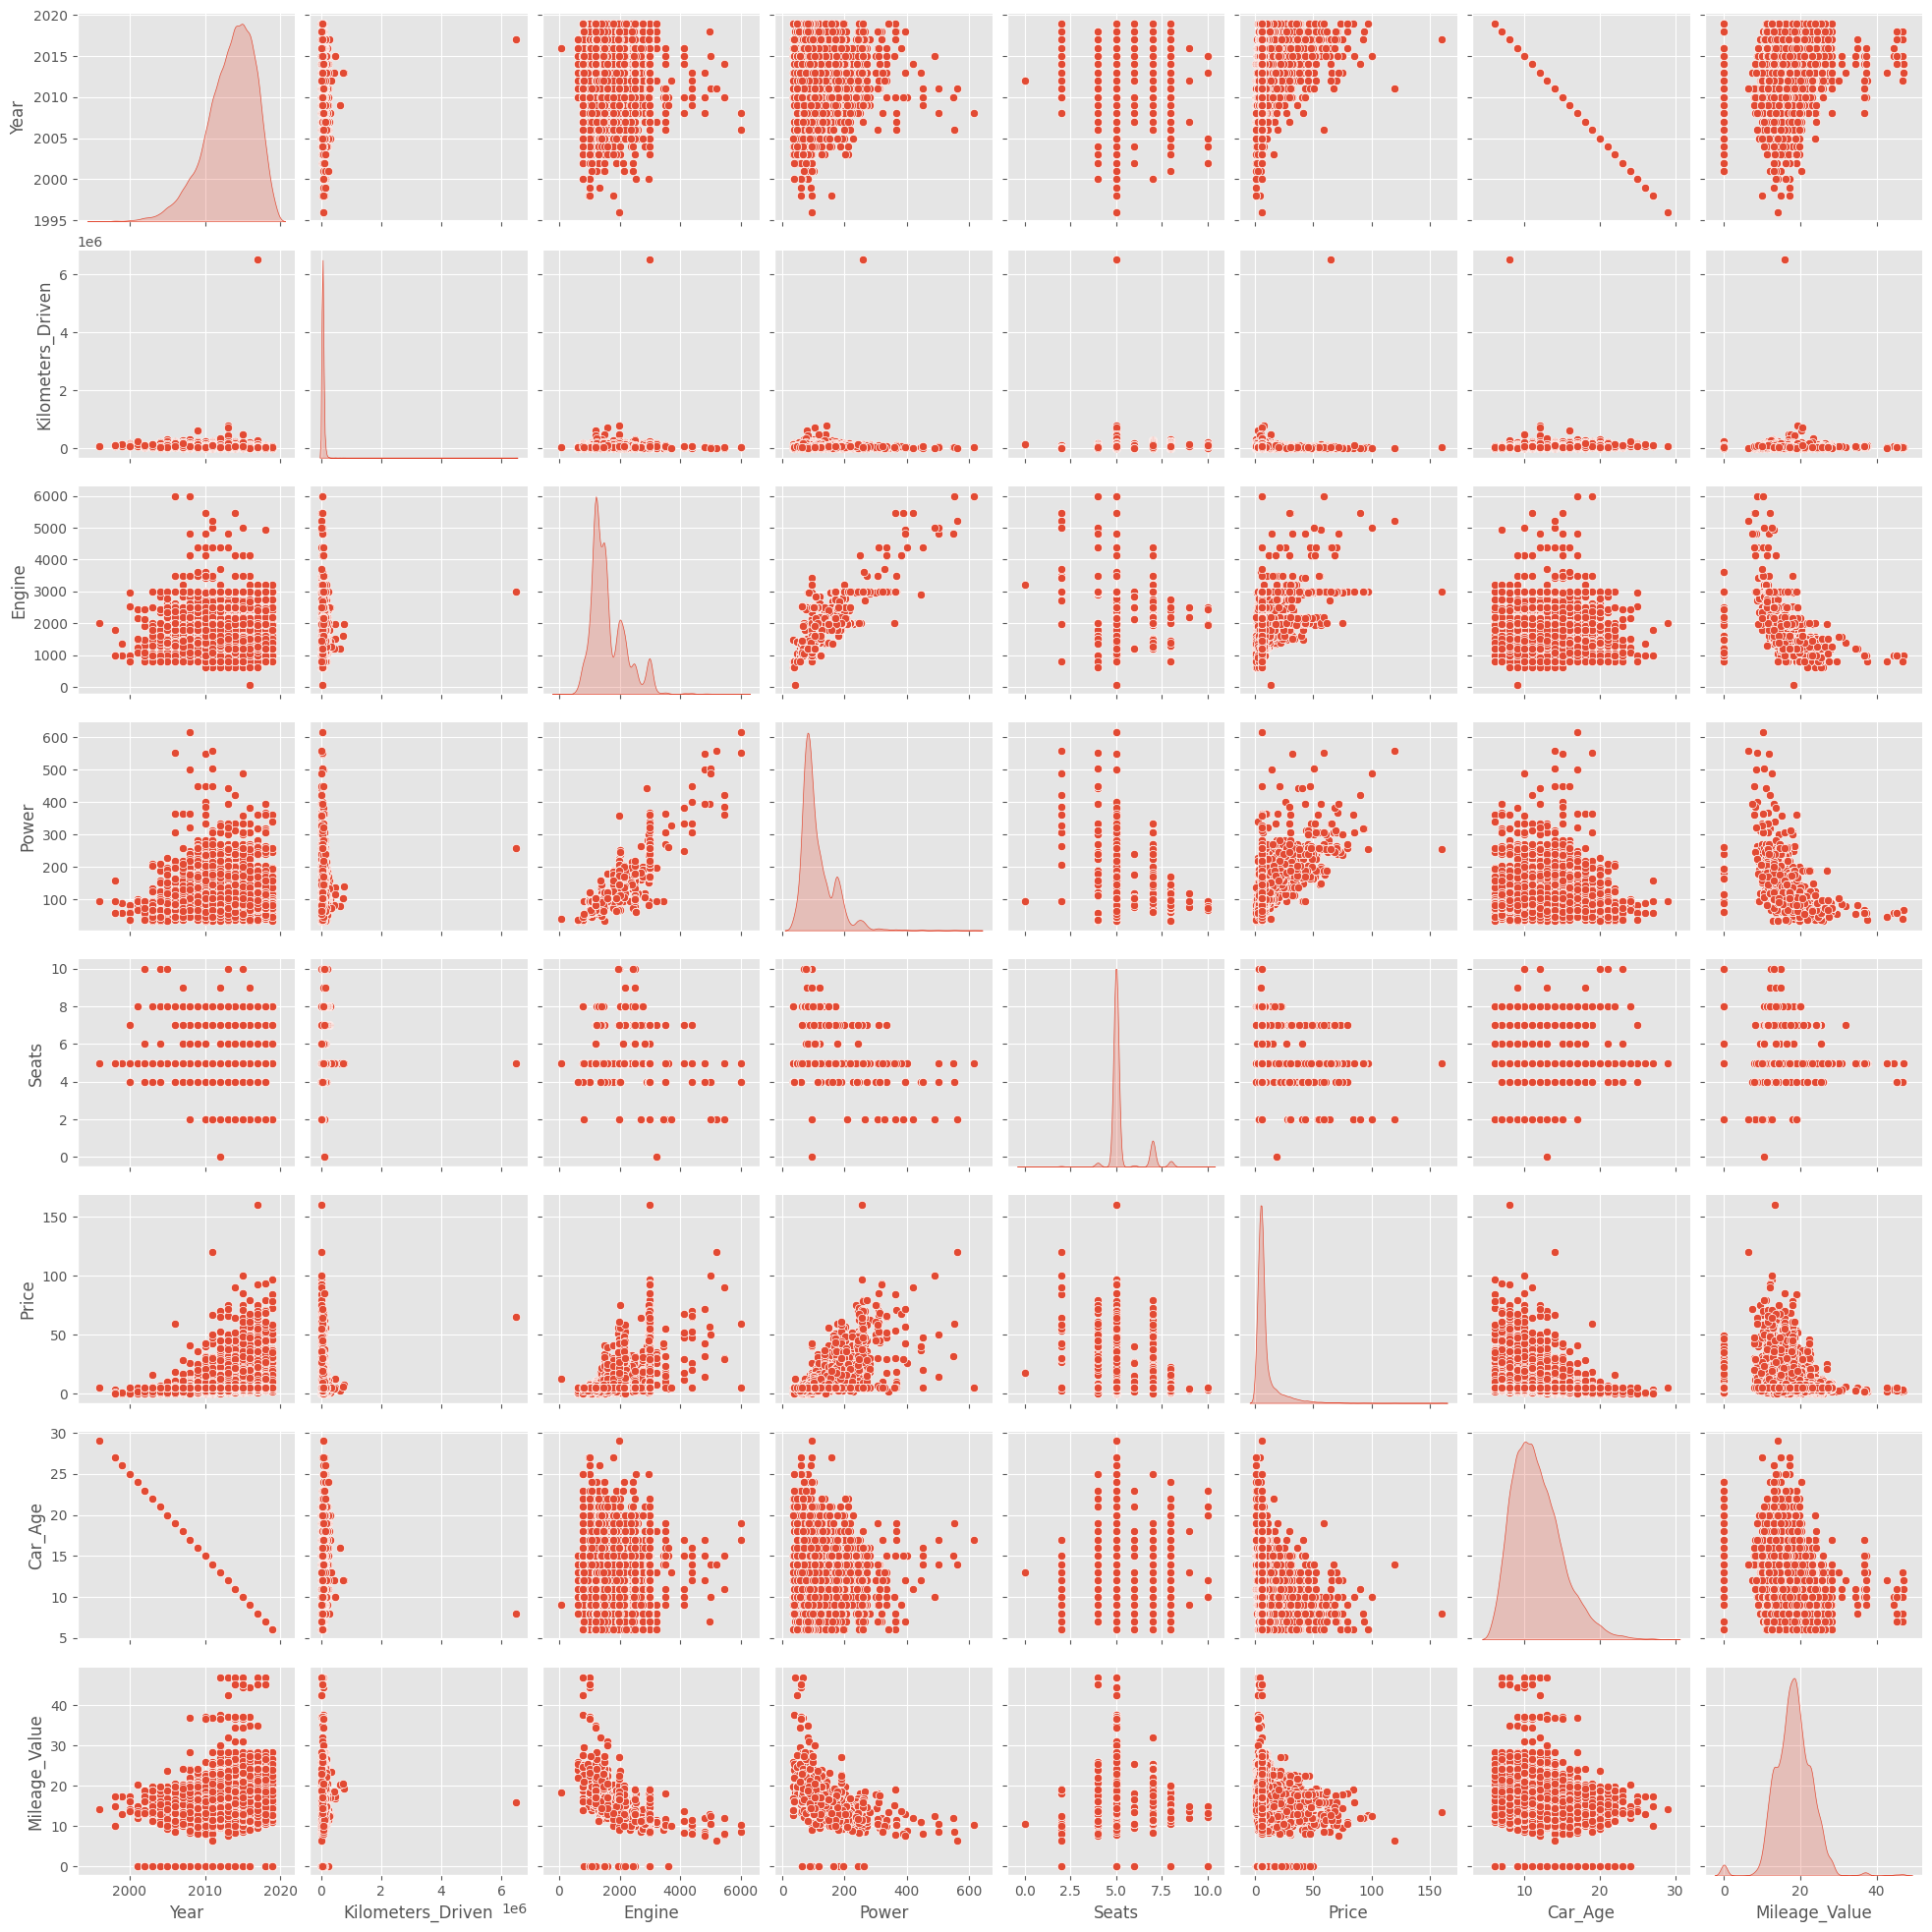

In [ ]:
# Pairplot
sns.pairplot(data = data[num_cols], diag_kind= 'kde' )

<Axes: >

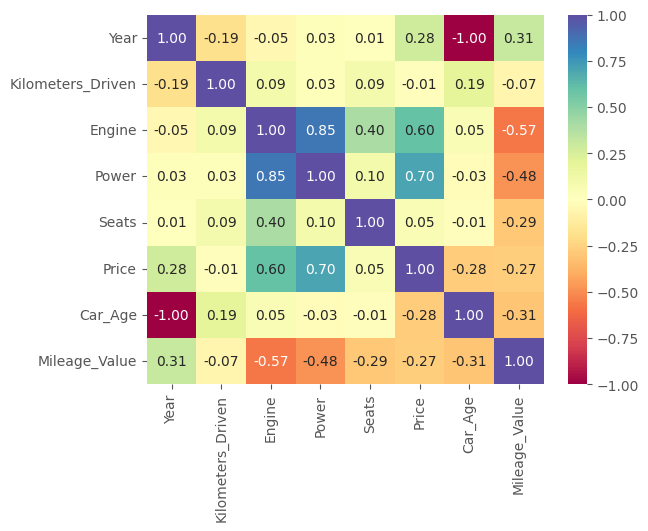

In [ ]:
# Correlation Heatmap
sns.heatmap(data[num_cols].corr(), annot = True, fmt = '.2f', vmin =-1, vmax =1, cmap = 'Spectral')

# BIVARIATE ANALYSIS

<Axes: xlabel='Year', ylabel='Price'>

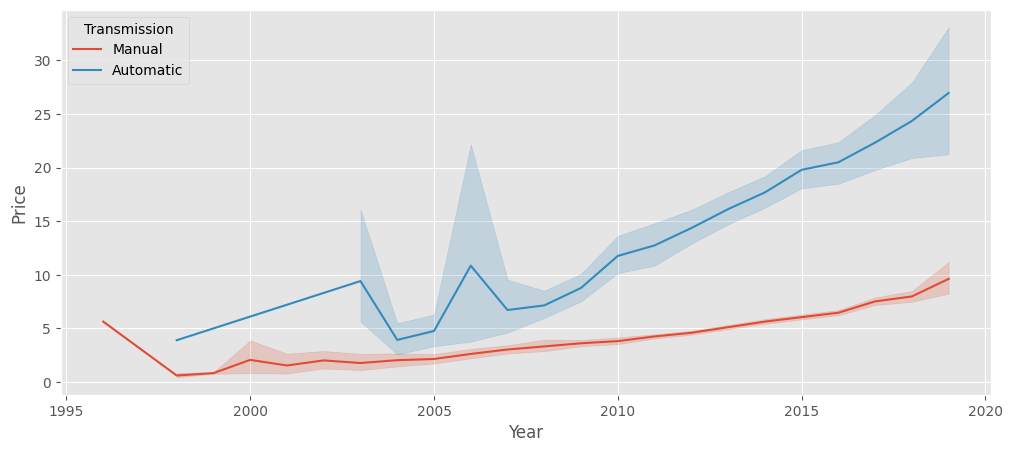

In [ ]:
# Year vs Price by Transmission
plt.figure(figsize = (10,7))
sns.lineplot(data = data , x = 'Year', y = 'Price', hue ='Transmission')

<Axes: xlabel='Year', ylabel='Price'>

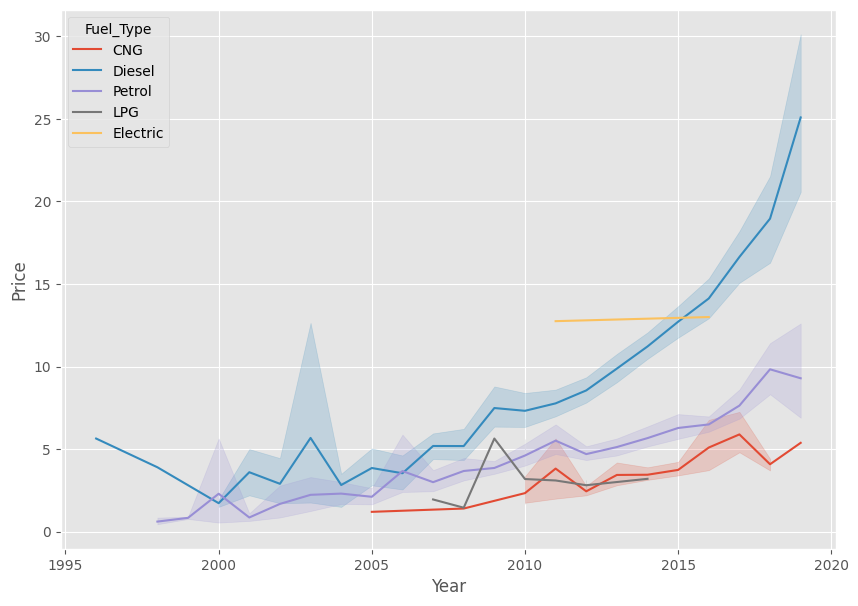

In [ ]:
# Year vs Price by Fuel Type
plt.figure(figsize = (10,7))
sns.lineplot(data = data , x = 'Year', y = 'Price', hue ='Fuel_Type')

<Axes: xlabel='Year', ylabel='Price'>

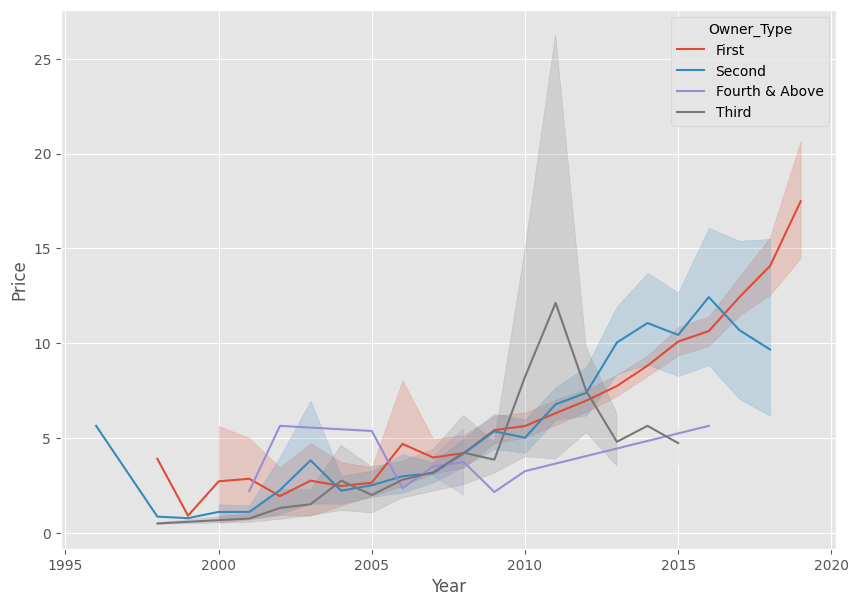

In [ ]:
# Year vs Price by Owner Type
plt.figure(figsize = (10,7))
sns.lineplot(data = data , x = 'Year', y = 'Price', hue ='Owner_Type')

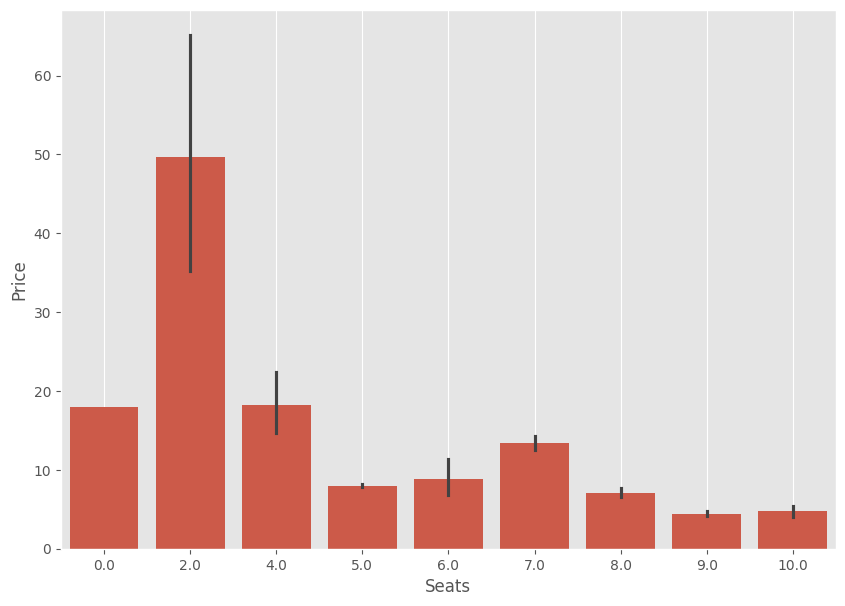

In [ ]:
# Seats vs Price
plt.figure(figsize = (10,7))
sns.barplot(data = data , x = 'Seats', y = 'Price')
plt.grid()